In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ctypes import *

In [22]:
path_to_dll = "C:/Users/Maathess/Desktop/IMDB_projet_annuel/projet_annuel/cmake-build-debug/libtest.dll"
mylib = cdll.LoadLibrary(path_to_dll)

In [23]:
#INITIALISATION DES ENTREES/SORTIES
mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)


mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None

# Utilisation du Modèle linéaire pour la classification

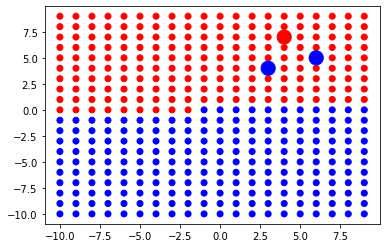

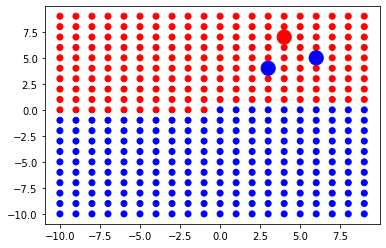

In [24]:

dataset_inputs = [
                [3, 4],
                [6, 5],
                [4, 7],
]

dataset_expected_outputs = [
                1,
                1,
                -1,
]

model = mylib.create_linear_model(2)

test_dataset = [[x1, x2] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

result = []
add_int = np.ctypeslib.as_array(model, (3,))
for p in test_dataset:
    arr_res1 = c_float * len(p)
    arr_res2 = arr_res1(*p)
    
    mylib.predict_linear_model_classification.argtypes = [POINTER(c_float), arr_res1, c_int]
    mylib.predict_linear_model_classification.restype = c_float
    curr = mylib.predict_linear_model_classification(model, arr_res2, len(add_int))
    result.append(curr)

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in result]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()


'''
WITH TRAINING
'''
flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])
    
#inputs
flattened_df_inputs = c_float * len(flattened_dataset_inputs)
arr_inputs = flattened_df_inputs(*flattened_dataset_inputs)

#outputs
flattened_df_outputs = c_float * len(dataset_expected_outputs)
arr_outputs = arr_type_outputs(*dataset_expected_outputs)

mylib.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_float), flattened_df_inputs, flattened_df_outputs, c_float, c_int]
mylib.train_classification_rosenblatt_rule_linear_model.restype = None
mylib.train_classification_rosenblatt_rule_linear_model(model, arr_inputs, arr_outputs, 0.001, 10000)


result2 = []
for p in test_dataset:
    arr_res3 = c_float * len(p)
    arr_res4 = arr_res1(*p)

    mylib.predict_linear_model_classification.argtypes = [POINTER(c_float), arr_res1, c_int]
    mylib.predict_linear_model_classification.restype = c_float
    curr1 = mylib.predict_linear_model_classification(model, arr_res4, len(add_int))
    result2.append(curr1)

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in result2]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])


mylib.destroy_linear_model(model)


# Utilisation du Modèle linéaire pour la régression

In [27]:
dataset_inputs = [
                [-5],
                [4],
                [6],
]

dataset_expected_outputs = [
                5.2,
                7,
                8.3
]

add_int = np.ctypeslib.as_array(model, (2,))

model = mylib.create_linear_model(1)
flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])

arr_flat_size = len(flattened_dataset_inputs)
arr_flat_type = c_float * arr_flat_size
arr_flattened_dataset_inputs = arr_flat_type(*flattened_dataset_inputs)

arr_dataset_size = len(dataset_expected_outputs)
arr_dataset_type = c_float * arr_dataset_size
arr_dataset = arr_dataset_type(*dataset_expected_outputs)

mylib.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_float), arr_flat_type, arr_dataset_type, c_int, c_int,c_int]

mylib.train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset,2,len(flattened_dataset_inputs), len(dataset_expected_outputs))


test_dataset_inputs = []
for i in range(-10, 11):
    temp = i
    test_dataset_inputs.append(float(temp))
    
result = []
for p in test_dataset_inputs:
    arrsizeP = len([p])
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*[p])
    mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), arrtypeP, c_int]
    mylib.predict_linear_model_regression.restype = c_float

    tmp = mylib.predict_linear_model_regression(model, arrP, 2)
    result.append(tmp)
    
plt.plot(test_dataset_inputs, result)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()


mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None

mylib.destroy_linear_model(model)

'''test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [predict_linear_model_regression(model, [p])  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

train_regression_pseudo_inverse_linear_model(model, flattened_dataset_inputs, dataset_expected_outputs)

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [predict_linear_model_regression(model, [p])  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

destroy_linear_model(model)'''

AttributeError: function 'train_regression_pseudo_inverse_linear_model' not found